In [0]:
# Week 2:  Bigram Frequencies and Mutual Information
# This file has small examples that are meant to be run individually
# in the Python interpreter or jupyter notebook cells

In [0]:
import pandas as pd
import io

In [0]:
# Getting started to process a text example
import nltk
from nltk import FreqDist
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# get the text of the lyrics, tokenize it,
#   and reduce the tokens to lowercase.
#file0 = nltk.corpus.gutenberg.fileids( ) [3]
#hanktext = nltk.corpus.gutenberg.raw(file0)
f = open('hankedit.txt')
raw = f.read()
hanktokens = nltk.word_tokenize(raw) 
hankwords = [w.lower( ) for w in hanktokens] 
# show some of thv words
print(len(hankwords))
print(hankwords[ :110])

8050
['if', 'the', 'wife', 'and', 'i', 'are', 'fussin', "'", ',', 'brother', ',', 'that', "'s", 'our', 'right', "'cause", 'me', 'and', 'that', 'sweet', 'woman', "'s", 'got', 'a', 'license', 'to', 'fight', 'why', 'do', "n't", 'you', 'mind', 'your', 'own', 'business', '?', 'mind', 'your', 'own', 'business', "'cause", 'if', 'you', 'mind', 'your', 'business', ',', 'then', 'you', 'wo', "n't", 'be', 'mindin', "'", 'mine', 'oh', ',', 'the', 'woman', 'on', 'our', 'party', 'line', "'s", 'the', 'nosiest', 'thing', 'she', 'picks', 'up', 'her', 'receiver', 'when', 'she', 'knows', 'it', "'s", 'my', 'ring', 'why', 'do', "n't", 'you', 'mind', 'your', 'own', 'business', '?', 'mind', 'your', 'own', 'business', "'cause", 'if', 'you', 'mind', 'your', 'business', ',', 'then', 'you', 'wo', "n't", 'be', 'mindin', "'", 'mine', 'i', 'got', 'a']


In [0]:
# Creating a frequency distribution of words
ndist = FreqDist(hankwords)

In [0]:
# print the top 50 tokens by frequency
nitems = ndist.most_common(50)
for item in nitems:
    print (item[0], '\t', item[1])

i 	 327
the 	 308
, 	 234
and 	 215
a 	 190
you 	 184
my 	 143
me 	 133
to 	 124
in 	 116
's 	 115
on 	 110
' 	 104
'' 	 104
'll 	 100
it 	 90
of 	 83
that 	 74
your 	 74
n't 	 71
got 	 56
he 	 56
do 	 53
'm 	 52
lord 	 48
when 	 47
she 	 45
we 	 45
love 	 44
but 	 44
no 	 44
have 	 44
be 	 43
all 	 43
for 	 42
over 	 42
so 	 40
is 	 40
heart 	 36
was 	 36
with 	 35
there 	 32
oh 	 30
like 	 30
- 	 29
just 	 28
down 	 28
will 	 27
if 	 26
new 	 26


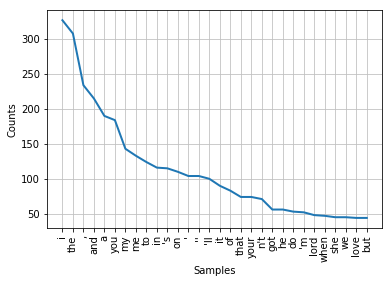

In [0]:
ndist.plot(30,cumulative=False)

In [0]:
print(hankwords[:160])
#print(hankwords2lowercase[:160])

['if', 'the', 'wife', 'and', 'i', 'are', 'fussin', "'", ',', 'brother', ',', 'that', "'s", 'our', 'right', "'cause", 'me', 'and', 'that', 'sweet', 'woman', "'s", 'got', 'a', 'license', 'to', 'fight', 'why', 'do', "n't", 'you', 'mind', 'your', 'own', 'business', '?', 'mind', 'your', 'own', 'business', "'cause", 'if', 'you', 'mind', 'your', 'business', ',', 'then', 'you', 'wo', "n't", 'be', 'mindin', "'", 'mine', 'oh', ',', 'the', 'woman', 'on', 'our', 'party', 'line', "'s", 'the', 'nosiest', 'thing', 'she', 'picks', 'up', 'her', 'receiver', 'when', 'she', 'knows', 'it', "'s", 'my', 'ring', 'why', 'do', "n't", 'you', 'mind', 'your', 'own', 'business', '?', 'mind', 'your', 'own', 'business', "'cause", 'if', 'you', 'mind', 'your', 'business', ',', 'then', 'you', 'wo', "n't", 'be', 'mindin', "'", 'mine', 'i', 'got', 'a', 'little', 'gal', 'that', 'wears', 'her', 'hair', 'up', 'high', 'the', 'boys', 'all', 'whistle', 'when', 'she', 'walks', 'by', 'why', 'do', "n't", 'you', 'mind', 'your', 'ow

In [0]:
# this function takes a string and a list of words as parameters.
#   It will return all the words in the list that contain the string as a substring
def searchstring (substring, wordlist):
    # initialize the result
    result = [ ]
    #  loop over all the words
    for word in wordlist:
        # test each word if it contains the substring
        if substring in word:
            # add it to the result
            result.append(word)
    return result

In [0]:
searchstring('z', hankwords)

['lazarus', "buzzin'", 'dozen', 'magazines', 'magazines', 'crazy']

In [0]:
##  Regular Expression to match non-alphabetic characters
import re

In [0]:
# this regular expression pattern matches any word that contains all non-alphabetical
#   lower-case characters [^a-z]+
# the beginning ^ and ending $ require the match to begin and end on a word boundary 
pattern = re.compile('^[^a-z]+$')

In [0]:
nonAlphaMatch = pattern.match('**')
#  if it matched, print a message
if nonAlphaMatch: print ('matched non-alphabetical')

matched non-alphabetical


In [0]:
# function that takes a word and returns true if it consists only
#   of non-alphabetic characters  (assumes import re)
def alpha_filter(w):
  # pattern to match word of non-alphabetical characters
  pattern = re.compile('^[^a-z]+$')
  if (pattern.match(w)):
    return True
  else:
    return False

In [0]:
# apply the function to hankwords
alphahankwords = [w for w in hankwords if not alpha_filter(w)]
print(alphahankwords[:100])
print(len(alphahankwords))

['if', 'the', 'wife', 'and', 'i', 'are', 'fussin', 'brother', 'that', "'s", 'our', 'right', "'cause", 'me', 'and', 'that', 'sweet', 'woman', "'s", 'got', 'a', 'license', 'to', 'fight', 'why', 'do', "n't", 'you', 'mind', 'your', 'own', 'business', 'mind', 'your', 'own', 'business', "'cause", 'if', 'you', 'mind', 'your', 'business', 'then', 'you', 'wo', "n't", 'be', 'mindin', 'mine', 'oh', 'the', 'woman', 'on', 'our', 'party', 'line', "'s", 'the', 'nosiest', 'thing', 'she', 'picks', 'up', 'her', 'receiver', 'when', 'she', 'knows', 'it', "'s", 'my', 'ring', 'why', 'do', "n't", 'you', 'mind', 'your', 'own', 'business', 'mind', 'your', 'own', 'business', "'cause", 'if', 'you', 'mind', 'your', 'business', 'then', 'you', 'wo', "n't", 'be', 'mindin', 'mine', 'i', 'got', 'a']
7473


In [0]:
# get a list of stopwords from nltk
nltkstopwords = nltk.corpus.stopwords.words('english')
print(len(nltkstopwords))
print(nltkstopwords)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [0]:
# check tokenization in hankwords
print(hankwords[:100])
print(hankwords[15300:15310])

['if', 'the', 'wife', 'and', 'i', 'are', 'fussin', "'", ',', 'brother', ',', 'that', "'s", 'our', 'right', "'cause", 'me', 'and', 'that', 'sweet', 'woman', "'s", 'got', 'a', 'license', 'to', 'fight', 'why', 'do', "n't", 'you', 'mind', 'your', 'own', 'business', '?', 'mind', 'your', 'own', 'business', "'cause", 'if', 'you', 'mind', 'your', 'business', ',', 'then', 'you', 'wo', "n't", 'be', 'mindin', "'", 'mine', 'oh', ',', 'the', 'woman', 'on', 'our', 'party', 'line', "'s", 'the', 'nosiest', 'thing', 'she', 'picks', 'up', 'her', 'receiver', 'when', 'she', 'knows', 'it', "'s", 'my', 'ring', 'why', 'do', "n't", 'you', 'mind', 'your', 'own', 'business', '?', 'mind', 'your', 'own', 'business', "'cause", 'if', 'you', 'mind', 'your', 'business', ',', 'then']
[]


In [0]:
morestopwords = ['hank','williams','could','would','might','must','need','sha','wo','y',"'s","'d","'ll","'t","'m","'re","'ve", "n't", 'repeat','chorus','verse']

In [0]:
stopwords = nltkstopwords + morestopwords
print(len(stopwords))
print(stopwords)

200
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [0]:
stoppedhankwords = [w for w in alphahankwords if not w in stopwords]
print(len(stoppedhankwords))

3435


In [0]:
# use this list for a better frequency distribution
hankdist = FreqDist(stoppedhankwords)
hankitems = hankdist.most_common(50)
for item in hankitems:
  print(item)

('got', 56)
('lord', 48)
('love', 44)
('heart', 36)
('oh', 30)
('like', 30)
('new', 26)
('old', 25)
('life', 25)
('never', 25)
('move', 23)
('honky', 22)
('mind', 21)
('say', 21)
('day', 21)
('know', 21)
('water', 20)
('well', 19)
('praise', 19)
('take', 19)
('free', 18)
('go', 17)
('blues', 17)
('ca', 17)
('light', 17)
('away', 17)
('business', 16)
('man', 16)
('see', 16)
('bucket', 16)
('soul', 16)
('dog', 16)
('let', 15)
('lost', 15)
('yea', 15)
('hole', 15)
('home', 14)
('made', 14)
('long', 14)
('cry', 14)
('cold', 14)
('tonk', 13)
('god', 13)
('gone', 13)
('come', 13)
('used', 13)
('lonesome', 13)
('one', 13)
('kaw-liga', 13)
('mine', 12)


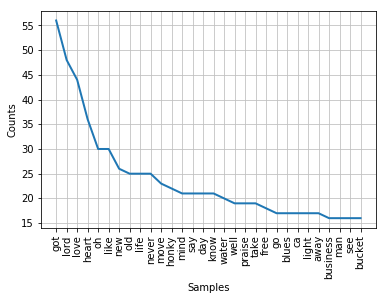

In [0]:
hankdist.plot(30,cumulative=False)

In [0]:
# Bigrams and Bigram frequency distribution
hankbigrams = list(nltk.bigrams(hankwords))
print(hankwords[:21])
print(hankbigrams[:20])

['if', 'the', 'wife', 'and', 'i', 'are', 'fussin', "'", ',', 'brother', ',', 'that', "'s", 'our', 'right', "'cause", 'me', 'and', 'that', 'sweet', 'woman']
[('if', 'the'), ('the', 'wife'), ('wife', 'and'), ('and', 'i'), ('i', 'are'), ('are', 'fussin'), ('fussin', "'"), ("'", ','), (',', 'brother'), ('brother', ','), (',', 'that'), ('that', "'s"), ("'s", 'our'), ('our', 'right'), ('right', "'cause"), ("'cause", 'me'), ('me', 'and'), ('and', 'that'), ('that', 'sweet'), ('sweet', 'woman')]


In [0]:
# setup for bigrams and bigram measures
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [0]:
# create the bigram finder and score the bigrams by frequency
# BIGRAMS MUST BE APPLIED TO COMPLETE WORD LIST WITHOUT REMOVED STOP WORDS -- LOWER CASE OK
finder = BigramCollocationFinder.from_words(hankwords)
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [0]:
# scored is a list of bigram pairs with their score
print(type(scored))
first = scored[0]
print(type(first))
print(first)

<class 'list'>
<class 'tuple'>
(('i', "'m"), 0.006459627329192546)


In [0]:
# scores are sorted in decreasing frequency
for bscore in scored[:50]:
    print (bscore)

(('i', "'m"), 0.006459627329192546)
(("''", "''"), 0.005714285714285714)
(('i', "'ll"), 0.0055900621118012426)
((',', 'i'), 0.004720496894409938)
(('on', 'the'), 0.003975155279503106)
(("'ll", 'have'), 0.0036024844720496892)
(('it', 'on'), 0.0036024844720496892)
(('do', "n't"), 0.0034782608695652175)
(('on', 'over'), 0.0034782608695652175)
(('in', 'the'), 0.0033540372670807454)
(('have', 'a'), 0.0029813664596273293)
(('a', 'new'), 0.002857142857142857)
(('got', 'a'), 0.002857142857142857)
(('lord', ','), 0.002857142857142857)
(('we', "'ll"), 0.002732919254658385)
(('i', 'got'), 0.002484472049689441)
(("'s", 'got'), 0.002360248447204969)
(('and', 'i'), 0.0022360248447204968)
(('ca', "n't"), 0.002111801242236025)
(('the', 'lord'), 0.002111801242236025)
(('in', 'it'), 0.001987577639751553)
(('move', 'it'), 0.001987577639751553)
(('my', 'heart'), 0.001987577639751553)
(("n't", 'you'), 0.001987577639751553)
(('you', "'ll"), 0.001987577639751553)
(('!', 'my'), 0.0018633540372670807)
((',', '

In [0]:
# apply a filter to remove non-alphabetical tokens from the hank bigram finder
finder.apply_word_filter(alpha_filter)
scored = finder.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:30]:
    print (bscore)

(('i', "'m"), 0.006459627329192546)
(('i', "'ll"), 0.0055900621118012426)
(('on', 'the'), 0.003975155279503106)
(("'ll", 'have'), 0.0036024844720496892)
(('it', 'on'), 0.0036024844720496892)
(('do', "n't"), 0.0034782608695652175)
(('on', 'over'), 0.0034782608695652175)
(('in', 'the'), 0.0033540372670807454)
(('have', 'a'), 0.0029813664596273293)
(('a', 'new'), 0.002857142857142857)
(('got', 'a'), 0.002857142857142857)
(('we', "'ll"), 0.002732919254658385)
(('i', 'got'), 0.002484472049689441)
(("'s", 'got'), 0.002360248447204969)
(('and', 'i'), 0.0022360248447204968)
(('ca', "n't"), 0.002111801242236025)
(('the', 'lord'), 0.002111801242236025)
(('in', 'it'), 0.001987577639751553)
(('move', 'it'), 0.001987577639751553)
(('my', 'heart'), 0.001987577639751553)
(("n't", 'you'), 0.001987577639751553)
(('you', "'ll"), 0.001987577639751553)
(('a', 'hole'), 0.0018633540372670807)
(('bucket', "'s"), 0.0018633540372670807)
(('hole', 'in'), 0.0018633540372670807)
(('mind', 'your'), 0.0018633540372

In [0]:
# apply a filter to remove stop words
# lambda is a function definition 'on the fly'
finder.apply_word_filter(lambda w: w in stopwords)
scored = finder.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:50]:
    print (bscore)

(('tonk', 'blues'), 0.0014906832298136647)
(('body', 'praise'), 0.0011180124223602484)
(('gon', 'na'), 0.0011180124223602484)
(('honky', 'tonk'), 0.0011180124223602484)
(('honky', 'tonkin'), 0.0011180124223602484)
(('new', 'body'), 0.0011180124223602484)
(('new', 'life'), 0.0011180124223602484)
(('clear', 'water'), 0.0009937888198757764)
(('big', 'fun'), 0.0008695652173913044)
(('blues', 'well'), 0.0008695652173913044)
(('dog', 'cause'), 0.0008695652173913044)
(('precious', 'lord'), 0.0008695652173913044)
(('country', 'church'), 0.0007453416149068323)
(('go', 'honky'), 0.0007453416149068323)
(('oh', 'lord'), 0.0007453416149068323)
(('old', 'country'), 0.0007453416149068323)
(('poor', 'old'), 0.0007453416149068323)
(('fly', 'away'), 0.0006211180124223603)
(('got', 'ta'), 0.0006211180124223603)
(('never', 'let'), 0.0006211180124223603)
(('old', 'kaw-liga'), 0.0006211180124223603)
(('poor', 'soul'), 0.0006211180124223603)
(('wedding', 'bells'), 0.0006211180124223603)
(('bayou', 'jambalaya

In [0]:
# apply a filter (on a new finder) to remove low frequency words
finder2 = BigramCollocationFinder.from_words(hankwords)
finder2.apply_freq_filter(2)
scored = finder2.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:20]:
    print (bscore)

(('i', "'m"), 0.006459627329192546)
(("''", "''"), 0.005714285714285714)
(('i', "'ll"), 0.0055900621118012426)
((',', 'i'), 0.004720496894409938)
(('on', 'the'), 0.003975155279503106)
(("'ll", 'have'), 0.0036024844720496892)
(('it', 'on'), 0.0036024844720496892)
(('do', "n't"), 0.0034782608695652175)
(('on', 'over'), 0.0034782608695652175)
(('in', 'the'), 0.0033540372670807454)
(('have', 'a'), 0.0029813664596273293)
(('a', 'new'), 0.002857142857142857)
(('got', 'a'), 0.002857142857142857)
(('lord', ','), 0.002857142857142857)
(('we', "'ll"), 0.002732919254658385)
(('i', 'got'), 0.002484472049689441)
(("'s", 'got'), 0.002360248447204969)
(('and', 'i'), 0.0022360248447204968)
(('ca', "n't"), 0.002111801242236025)
(('the', 'lord'), 0.002111801242236025)


In [0]:
# apply a filter on both words of the ngram
finder2.apply_ngram_filter(lambda w1, w2: len(w1) < 2)
scored = finder2.score_ngrams(bigram_measures.raw_freq)
for bscore in scored[:20]:
    print (bscore)

(("''", "''"), 0.005714285714285714)
(('on', 'the'), 0.003975155279503106)
(("'ll", 'have'), 0.0036024844720496892)
(('it', 'on'), 0.0036024844720496892)
(('do', "n't"), 0.0034782608695652175)
(('on', 'over'), 0.0034782608695652175)
(('in', 'the'), 0.0033540372670807454)
(('have', 'a'), 0.0029813664596273293)
(('got', 'a'), 0.002857142857142857)
(('lord', ','), 0.002857142857142857)
(('we', "'ll"), 0.002732919254658385)
(("'s", 'got'), 0.002360248447204969)
(('and', 'i'), 0.0022360248447204968)
(('ca', "n't"), 0.002111801242236025)
(('the', 'lord'), 0.002111801242236025)
(('in', 'it'), 0.001987577639751553)
(('move', 'it'), 0.001987577639751553)
(('my', 'heart'), 0.001987577639751553)
(("n't", 'you'), 0.001987577639751553)
(('you', "'ll"), 0.001987577639751553)


In [0]:
### pointwise mutual information
### THIS IS THE WRONG WAY TO DO THIS -- ONLY SCORES THINGS THAT OCCUR TOGETHER SUCH AS COMMON WORDS
### APPLY A FREQUENCY FILTER OF ABOUT 5 AS SHOWN BELOW
finder3 = BigramCollocationFinder.from_words(hankwords)
scored = finder3.score_ngrams(bigram_measures.pmi)
for bscore in scored[:50]:
    print (bscore)

(("allowin'", 'tomorrow'), 12.974773067889343)
(('alright', 'no-how'), 12.974773067889343)
(('awful', 'shape'), 12.974773067889343)
(('barren', 'waste'), 12.974773067889343)
(('blossoms', 'unfold'), 12.974773067889343)
(('bursting', 'saints'), 12.974773067889343)
(("buzzin'", 'kinfolk'), 12.974773067889343)
(('car', 'speeded'), 12.974773067889343)
(('children', 'laughing'), 12.974773067889343)
(('coal', 'black'), 12.974773067889343)
(('crushed', 'broken'), 12.974773067889343)
(('distant', 'uncle'), 12.974773067889343)
(('divine', 'fills'), 12.974773067889343)
(('doggish', 'ways'), 12.974773067889343)
(('dollar', 'bill'), 12.974773067889343)
(('dozen', 'dressed'), 12.974773067889343)
(('evil', 'scheme'), 12.974773067889343)
(('feller', 'dress'), 12.974773067889343)
(('future', 'looks'), 12.974773067889343)
(('gabriel', 'blows'), 12.974773067889343)
(('goes', 'crawling'), 12.974773067889343)
(('grow', 'dim'), 12.974773067889343)
(('grows', 'drear'), 12.974773067889343)
(('hog', 'wild'), 

In [0]:
# to get good results, must first apply frequency filter
finder.apply_freq_filter(5)
scored = finder.score_ngrams(bigram_measures.pmi)
for bscore in scored[:50]:
    print (bscore)

(('wedding', 'bells'), 10.389810567168187)
(('country', 'church'), 9.974773067889341)
(('gon', 'na'), 9.65284497300198)
(('big', 'fun'), 9.290274893617273)
(('tonk', 'blues'), 8.771833009219067)
(('clear', 'water'), 8.652844973001981)
(('fly', 'away'), 8.62427582080521)
(('body', 'praise'), 8.574842461000706)
(('honky', 'tonkin'), 8.515341449252045)
(('dog', 'cause'), 8.32269637130965)
(('new', 'body'), 8.122330256303199)
(('honky', 'tonk'), 7.984826732553264)
(('old', 'country'), 7.915879378835775)
(('poor', 'soul'), 7.837269544139407)
(('poor', 'old'), 7.4564477601984755)
(('blues', 'well'), 7.446737635253022)
(('got', 'ta'), 7.167418145831739)
(('precious', 'lord'), 7.027240487783477)
(('go', 'honky'), 7.012841108722862)
(('old', 'kaw-liga'), 6.952405254860889)
(('new', 'life'), 6.800402161415835)
(('never', 'let'), 6.745954377393462)
(('oh', 'lord'), 5.067882472280823)
